<a href="https://colab.research.google.com/github/Vinicius-DataAnalyst/portfolio/blob/main/02_PROJ_Education.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analisando dados de estudantes

kaggle link database: https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

importação de bibliotecas

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
!unzip "/content/drive/MyDrive/01_DATA ANALYTICS/01.Portfolio/PROJ_02_STUDENTS/archive.zip"

Archive:  /content/drive/MyDrive/01_DATA ANALYTICS/01.Portfolio/PROJ_02_STUDENTS/archive.zip
  inflating: StudentsPerformance.csv  


lendo csv e armazenando na variavel df

In [4]:
df = pd.read_csv("StudentsPerformance.csv")

In [5]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


observando se temos valores nulos

In [6]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


observando valores categoricos e numericos

In [7]:
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


observando se temos valores duplicados

In [8]:
df.duplicated().sum()

np.int64(0)

observando tipos de dados

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


observando a distribuição estatíticas dos dados nas colunas

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


notamos que:
- a media das 3 colunas numericas é ao redor de 7
- há casos emn que zeraram a prova
- 75% dos alunos acertam mais que 6 em todas as disciplinas
- E apenas 25% possuem uma médias ao redor de 8
- Há alunos que tiraram nota axima em todas as materias

----------------------------
Entendendo a distribuição da base por genero

In [11]:
freq = df['gender'].value_counts()

porc = df['gender'].value_counts(normalize=True)

resumo_genero = pd.DataFrame({'valores_unicos' : freq.index,
                              'contagem'       : freq.values,
                              'porcentagem'    : porc.values})
print(resumo_genero)

  valores_unicos  contagem  porcentagem
0         female       518        0.518
1           male       482        0.482


entendendo a distribuição por etinia

In [12]:
df_etica = df['race/ethnicity'].value_counts(normalize=True)
df_etica

,proportion
race/ethnicity,
group C,0.319
group D,0.262
group B,0.190
group E,0.140
group A,0.089


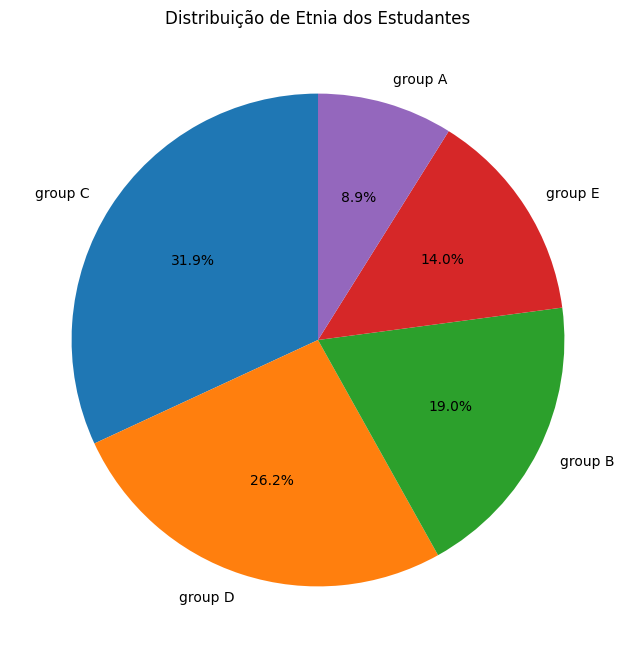

In [13]:
df_etica.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Etnia dos Estudantes')
plt.ylabel('')  # Remove o rótulo do eixo y, que não é necessário em um gráfico de pizza
plt.show()

entendendo sobre nivel educacional dos pais

In [14]:
df['parental level of education'].value_counts()

,count
parental level of education,
some college,226
associate's degree,222
high school,196
some high school,179
bachelor's degree,118
master's degree,59


avaliando distribuição de dados entre prova de matematica e genero

<Axes: xlabel='math score', ylabel='gender'>

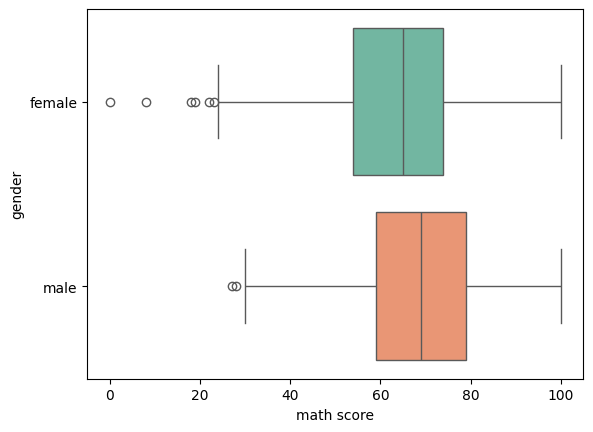

In [15]:
sns.boxplot( data = df ,
            x = 'math score',
            y = 'gender',
            palette = "Set2")

In [16]:
describe_df = df.groupby( by= 'gender').describe()['math score']
describe_df

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.633205,15.491453,0.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


Observamos uma maior dispersão de dados por parte da categoria female onde a maior parte dos outiliers está nos menores valores, o que deve ter puxado em parte a mediana para posições inferiores com relação à categoria male.

------------------------------------------
estudando se hipostese de retirada de outliers traria mais para perto visualmente as medianas

1. Ordenar linhas excluir as ultimas 10
2. plotar gráfico

In [17]:
indice_outlier_female_excluir = df[df['gender'] == 'female'].sort_values(by = 'math score', ascending=False).tail(10).index

df_hipotese_outlier = df.drop(indice_outlier_female_excluir)

<Axes: xlabel='math score', ylabel='gender'>

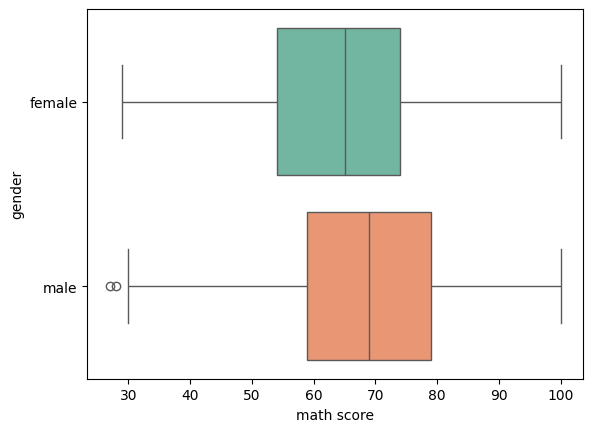

In [18]:
sns.boxplot( data = df_hipotese_outlier ,
            x = 'math score',
            y = 'gender',
            palette = "Set2")

In [19]:
describe_hipotese = df_hipotese_outlier.groupby( by= 'gender').describe()['math score']
describe_hipotese

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,508.0,64.500000,14.291899,29.0,54.0,65.0,74.0,100.0
male,482.0,68.728216,14.356277,27.0,59.0,69.0,79.0,100.0


comparando describes

In [20]:
print(describe_df)
print('---------------------'*4)
print(describe_hipotese)

        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  518.0  63.633205  15.491453   0.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0
------------------------------------------------------------------------------------
        count       mean        std   min   25%   50%   75%    max
gender                                                            
female  508.0  64.500000  14.291899  29.0  54.0  65.0  74.0  100.0
male    482.0  68.728216  14.356277  27.0  59.0  69.0  79.0  100.0


visualmente não houve uma diferença relevante na linha de mediana.
Interessante que os limites de quartis não se modificaram

avaliando distribuição de dados entre prova de leitura e genero

<Axes: xlabel='reading score', ylabel='gender'>

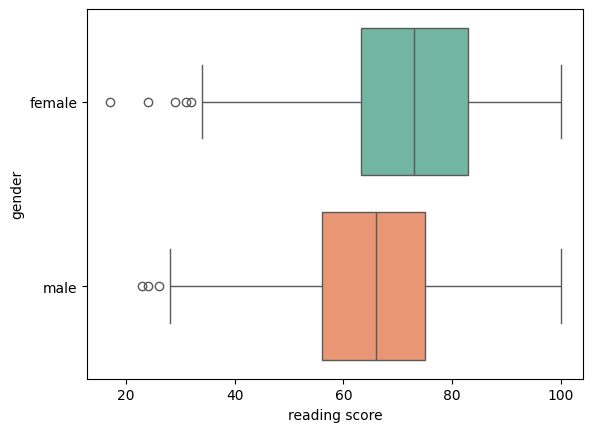

In [21]:
sns.boxplot( data = df ,
            x = 'reading score',
            y = 'gender',
            palette = "Set2")

com relação à prova de leitura aca tegoria female foi consideravelmente melhor que male

-------------------------------------------------------
Comparando a categoria

<Axes: xlabel='writing score', ylabel='gender'>

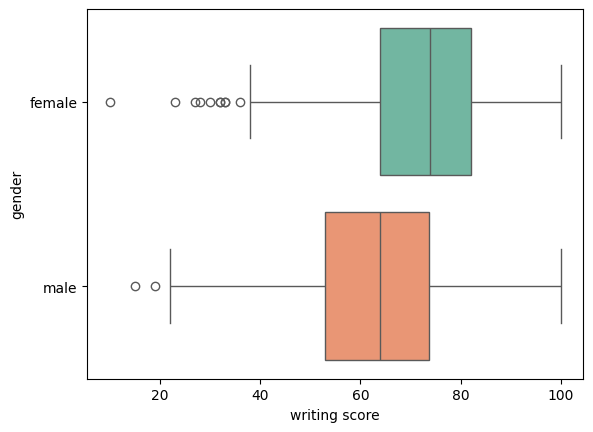

In [22]:
sns.boxplot( data = df ,
            x = 'writing score',
            y = 'gender',
            palette = "Set2")

entendendo a distribuição dos dados da categoria

In [26]:
sns.pairplot( x= 'math score', y = 'race/ethnicity')

TypeError: pairplot() got an unexpected keyword argument 'x'

In [25]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')